In [1]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
# create engine to hawaii
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [4]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
session = Session(engine)

In [8]:
# Printing column names for reference
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
mostRecentDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is: {mostRecentDate[0]}")

The most recent date in the data set is: 2017-08-23


In [10]:
intDateList = mostRecentDate[0].split('-') #splitting the date string to a list
for number in intDateList:
    print(number)
most_recent_query_date = dt.date(int(intDateList[0]), int(intDateList[1]), int(intDateList[2])) #converting to date object
print(f"After formatting as date object:\n{most_recent_query_date}\n")


2017
08
23
After formatting as date object:
2017-08-23



In [11]:
query_date = most_recent_query_date - dt.timedelta(days=365)
print(f"Date one year ago is:\n{query_date}")


Date one year ago is:
2016-08-23


In [12]:
query_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).order_by(Measurement.date).all()

In [13]:
df = pd.DataFrame(query_result)
df.set_index("date", inplace=True)
df.sort_values("date")

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


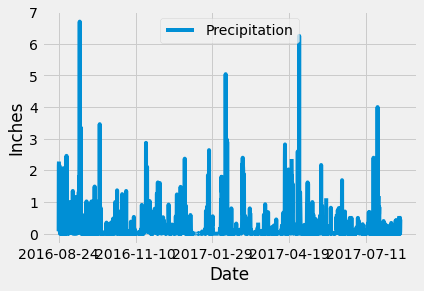

In [14]:
graph = df.plot()
graph.set_xlabel("Date")
graph.set_ylabel("Inches")
graph.legend(labels=["Precipitation"])

In [15]:
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
station_count = session.query(func.count(Station.station)).all()
print(f"There are {station_count[0][0]} stations.")

There are 9 stations.


In [17]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
most_active_single_station = most_active_stations[0][0] 
most_active_station_temperature_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_single_station).all()
min_temp = min(most_active_station_temperature_data)
max_temp = max(most_active_station_temperature_data)
avg_temp = round(np.mean(most_active_station_temperature_data),0)
print(f"The minimum temperature is: {min_temp[0]}, the maximum temperature is: {max_temp[0]}, and the average temperature is: {avg_temp}")

The minimum temperature is: 54.0, the maximum temperature is: 85.0, and the average temperature is: 72.0


2017
08
18
Starting query date (one year ago) is:
2016-08-18


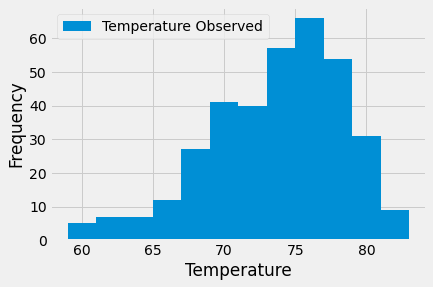

In [19]:
this_station_most_recent_date = session.query(Measurement.date).filter(Measurement.station == most_active_single_station).order_by(Measurement.date.desc()).first()

intDateListStation = this_station_most_recent_date[0].split('-') #splitting the formatted date to a list
for number in intDateListStation:
    print(number)

most_recent_query_date_station = dt.date(int(intDateListStation[0]), int(intDateListStation[1]), int(intDateListStation[2]))

query_date = most_recent_query_date_station - dt.timedelta(days=365)
print(f"Starting query date (one year ago) is:\n{query_date}")

station_temp_results = session.query(Measurement.tobs).filter(Measurement.station == most_active_single_station).filter(Measurement.date > query_date).all()

station_df = pd.DataFrame(station_temp_results)
histogram = station_df.plot.hist(bins=12)
histogram.set_xlabel("Temperature")
histogram.legend(labels=["Temperature Observed"])

In [20]:
session.close()